<a href="https://colab.research.google.com/github/esrayuzgec/ALZHEIMER_TEZ/blob/main/squeezenet_cnmild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
     

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastai.vision.all import *
from fastbook import *
     

In [45]:
path = Path("/content/gdrive/MyDrive/OASISCNMILD/Train")

In [46]:

path.ls()

(#18) [Path('/content/gdrive/MyDrive/OASISCNMILD/Train/MILD'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILD_new_ConvNext.pkl'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILDnew_convnext.pth'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILDnew_convnext_.pth'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILD_new_ConvNext_.pkl'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILDnew_resnet18_.pth'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILD_new_resnet18_.pkl'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILDnew_resnet50_.pth'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILD_new_resnet50_.pkl'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/oas-40epoch-resnet-50.pth')...]

In [47]:
train_fnames = get_image_files(path)


In [48]:

item_tfms=Resize(216)
batch_tfms=aug_transforms=[Normalize.from_stats(*imagenet_stats)]
     

In [49]:

braindb = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.1, seed = 42),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )
dls = braindb.dataloaders(path,bs=32)

In [50]:
learn = vision_learner(dls, squeezenet1_0, loss_func=CrossEntropyLossFlat(), metrics=accuracy)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0020892962347716093)

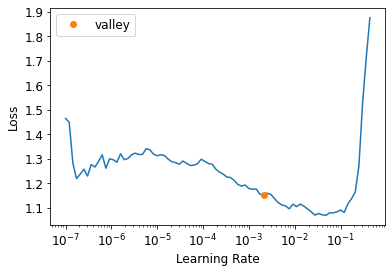

In [51]:
learn.lr_find()


In [52]:
learn.fine_tune(50,1.2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.735213,0.382371,0.832967,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.465123,0.263290,0.894506,00:14
1,0.389205,0.263709,0.857143,00:14
2,0.353603,0.195148,0.918681,00:14
3,0.288857,0.242727,0.923077,00:14
4,0.275378,0.155941,0.931868,00:15
5,0.229462,0.129578,0.938462,00:14
6,0.205423,0.182892,0.949451,00:14
7,0.181789,0.091112,0.964835,00:14
8,0.166673,0.168177,0.971429,00:15
9,0.142466,0.144508,0.938462,00:14


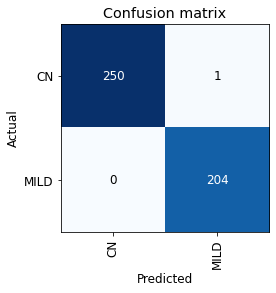

In [53]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

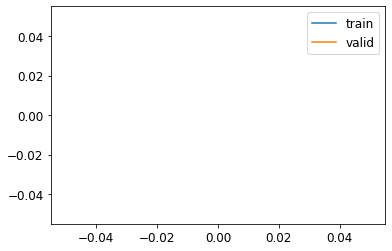

In [54]:
learn.recorder.plot_loss()


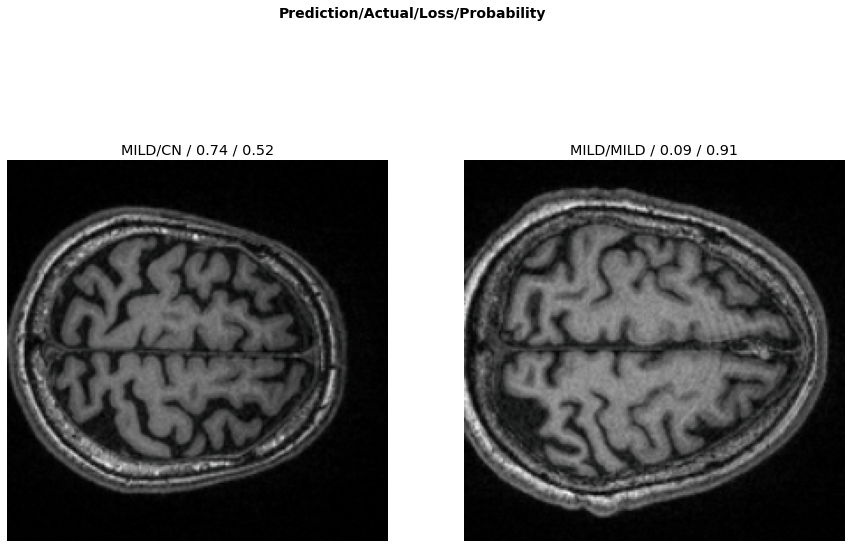

In [55]:

interp.plot_top_losses(2, figsize=(15,10))

In [56]:

interp.most_confused()


[('CN', 'MILD', 1)]

In [57]:

interp.print_classification_report()

              precision    recall  f1-score   support

          CN       1.00      1.00      1.00       251
        MILD       1.00      1.00      1.00       204

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [58]:
learn.save(path/'CNMILD_SqueezeNet_Train')

Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILD_SqueezeNet_Train.pth')

In [59]:

learn.export(path/'CNMILD_SqueezeNet_Train.pkl')


In [67]:
path = Path("/content/gdrive/MyDrive/OASISCNMILD")

In [68]:
all_files= get_image_files(path)

In [69]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                 get_y=parent_label,
                 item_tfms=Resize(216),
                 batch_tfms=Normalize.from_stats(*imagenet_stats)
                 
                 
)

In [70]:
dls_test = dblock.dataloaders(all_files)

In [71]:
print("Number of examples in testing:", len(dls_test.valid_ds))


Number of examples in testing: 1287


In [72]:
learn1 = vision_learner(dls_test, squeezenet1_0, metrics=accuracy).load('/content/gdrive/MyDrive/OASISCNMILD/CNMILD_SqueezeNet_Train')


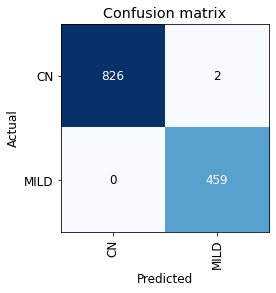

In [73]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [74]:

preds, targs = learn1.tta()
accuracy(preds, targs).item()
     

0.999222993850708

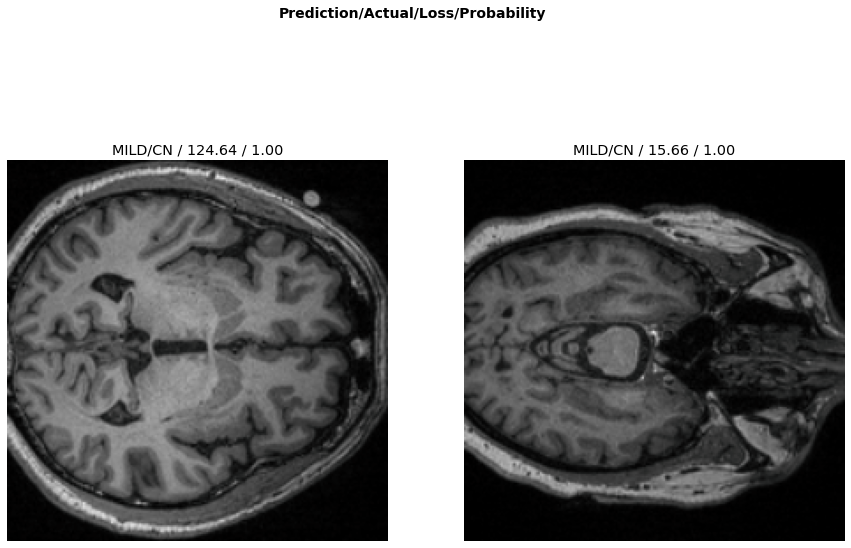

In [75]:
interp.plot_top_losses(2, figsize=(15,10))

In [76]:
learn_inf = load_learner('/content/gdrive/MyDrive/OASISCNMILD/CNMILD_SqueezeNet_Train.pkl')


In [77]:
learn_inf.predict('/content/gdrive/MyDrive/$R53JT25.png')


FileNotFoundError: ignored